## Working with A5 in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/03_a5.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/03_a5.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/03_a5.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/03_a5.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2a5

In [2]:
from vgrid.conversion.latlon2dggs import latlon2a5

lat = 10.775276
lon = 106.706797
res = 12
a5_hex = latlon2a5(lat, lon, res)
a5_hex

'7a9408e800000000'

### A5 to Shapely Polygon

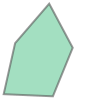

In [3]:
from vgrid.conversion.dggs2geo.a52geo import a52geo
a5_geo = a52geo(a5_hex)
a5_geo

### A5 to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.a52geo import a52geojson
import json
a5_geojson = a52geojson(a5_hex)
a5_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.71239575763866, 10.78701022358562),
      (106.70535378338678, 10.778851358998635),
      (106.70299425998425, 10.76831657110021),
      (106.71315636275037, 10.767875103340318),
      (106.71725325821848, 10.777905595108349),
      (106.71239575763866, 10.78701022358562)),)},
   'properties': {'a5': '7a9408e800000000',
    'resolution': 12,
    'center_lat': 10.7758211,
    'center_lon': 106.7103093,
    'avg_edge_len': 1165.531,
    'cell_area': 2026822.224,
    'cell_perimeter': 5827.657}}]}

### Vector to A5

ERROR [fiona._env:387  _read_file_fiona()] PROJ: proj_identify: Cannot find proj.db
Processing features: 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]


<Axes: >

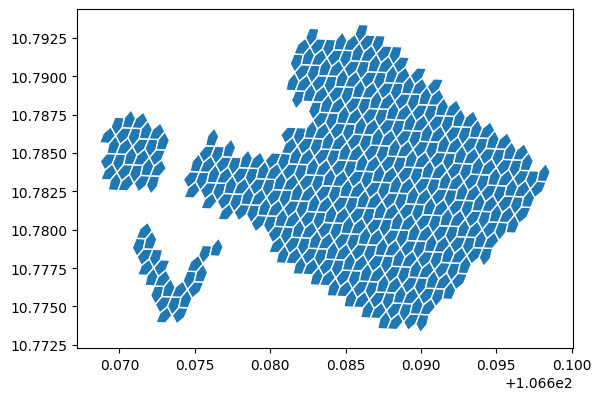

In [1]:
from vgrid.conversion.vector2dggs.vector2a5 import vector2a5

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_a5 = vector2a5(file_path, compact=False, resolution=16, 
                predicate = "intersects", output_format="gpd")
# Visualize vector_to_a5
vector_to_a5.plot(edgecolor="white")

### A5 Compact

<Axes: >

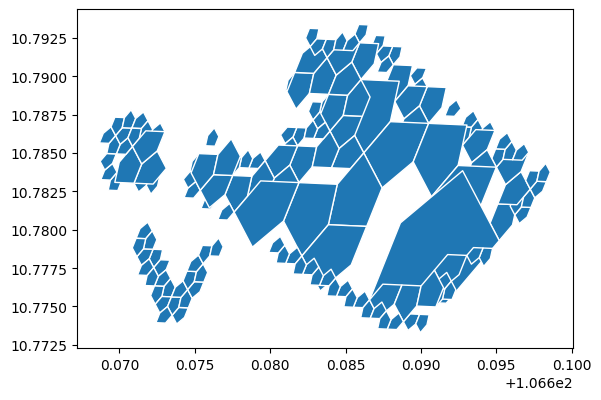

In [2]:
from vgrid.conversion.dggscompact.a5compact import a5compact

a5_compacted = a5compact(vector_to_a5, a5_hex="a5", output_format="gpd")
a5_compacted.plot(edgecolor="white")

### A5 Expand

<Axes: >

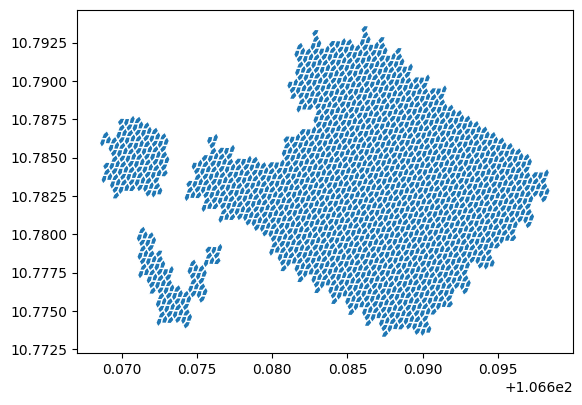

In [3]:
from vgrid.conversion.dggscompact.a5compact import a5expand

a5_expanded = a5expand(vector_to_a5, resolution=17, output_format="gpd")
a5_expanded.plot(edgecolor="white")

### A5 Binning

Generating A5 DGGS: 100%|██████████| 945/945 [00:00<00:00, 2271.71 cells/s]


<Axes: >

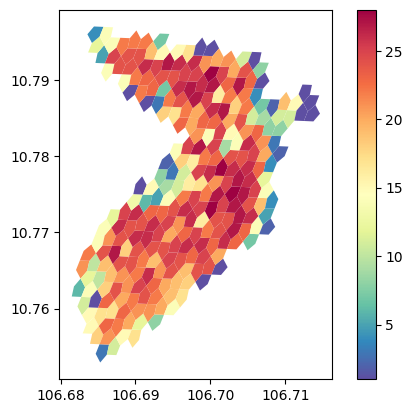

In [5]:
from vgrid.binning.a5bin import a5bin
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "variety"
a5_bin = a5bin(file_path, resolution=15, stats=stats, 
                numeric_field="confidence",
                # category="category",
                output_format="gpd")

a5_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)

### Raster to A5

In [9]:
# %pip install folium

In [10]:
from vgrid.conversion.raster2dggs.raster2a5 import raster2a5
from vgrid.utils.io import download_file

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)

raster_to_a5 =  raster2a5(raster_file,resolution=23,output_format="gpd")
# Visualize raster_to_a5
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

a5_layer = folium.GeoJson(
    raster_to_a5,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 0.5,
    },
    popup=folium.GeoJsonPopup(
        fields=["a5", "resolution", "band_1", "band_2", "band_3", "cell_area"],
        aliases=["A5 Hex", "Resolution", "Band 1", "Band 2", "Band 3", "Area (m²)"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(a5_layer.get_bounds())

# Display the map
m

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.


Building GeoDataFrame: 100%|██████████| 6392/6392 [00:35<00:00, 182.26 cells/s]


### A5 Generator

Generating A5 DGGS: 100%|██████████| 648/648 [00:05<00:00, 117.51 cells/s]


<Axes: >

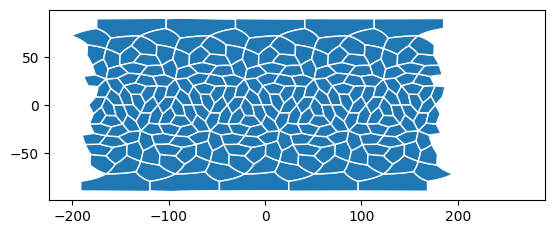

In [11]:
from vgrid.generator.a5grid import a5grid

a5_grid = a5grid(resolution=2,output_format="gpd")
# a5_grid = a5grid(resolution=16,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")  
a5_grid.plot(edgecolor='white')

### A5 Inspect

In [2]:
from vgrid.stats.a5stats import a5inspect
resolution = 5
a5_inspect = a5inspect(resolution)
a5_inspect.head()

Generating A5 DGGS:   0%|          | 0/41472 [00:00<?, ? cells/s]

Generating A5 DGGS: 100%|██████████| 41472/41472 [00:20<00:00, 2054.53 cells/s]


a5  resolution  center_lat  center_lon  avg_edge_len  \
0  c402000000000000           5  -88.778429  143.247090    146990.185   
1  c406000000000000           5  -87.450371  171.582970    148114.039   
2  c412000000000000           5  -86.388526 -169.620901    148227.201   
3  c44a000000000000           5  -84.470901 -177.258397    150415.196   
4  c446000000000000           5  -82.927396 -173.663764    149871.712   

      cell_area  cell_perimeter  \
0  3.311882e+10      734950.924   
1  3.318690e+10      740570.194   
2  3.317992e+10      741136.006   
3  3.323008e+10      752075.979   
4  3.319273e+10      749358.559   

                                            geometry  crossed  norm_area  \
0  POLYGON ((267 -90, 168.65049 -89.33266, 168.65...     True   0.997333   
1  POLYGON ((159 -86.10242, 157.01838 -86.76115, ...     True   0.999383   
2  POLYGON ((-181.58039 -86.57893, -174.9477 -87....     True   0.999172   
3  POLYGON ((-165 -85.42943, -168.30096 -84.80452...     True   1.000683   
4  POLYGON ((-181.52273 -81.83357, -180.65159 -82...     True   0.999558   

        ipq       zsc  
0  0.770492  0.877748  
1  0.760403  0.871983  
2  0.759083  0.871225  
3  0.738274  0.859201  
4  0.742803  0.861832

### Distribution of A5 Area Distortions

ERROR [fiona._env:387  _read_file_fiona()] PROJ: proj_identify: Cannot find proj.db


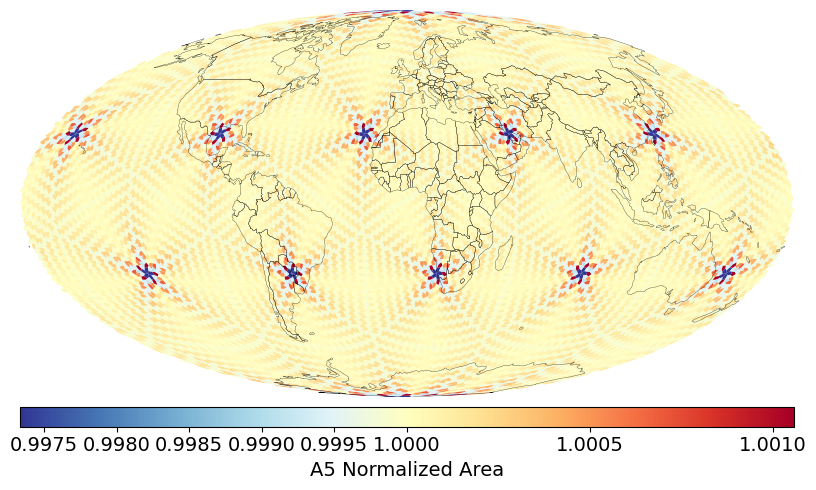

In [3]:
from vgrid.stats.a5stats import a5_norm_area
a5_norm_area(a5_inspect)

### Distribution of A5 IPQ Compactness

ERROR [fiona._env:387  _read_file_fiona()] PROJ: proj_identify: Cannot find proj.db


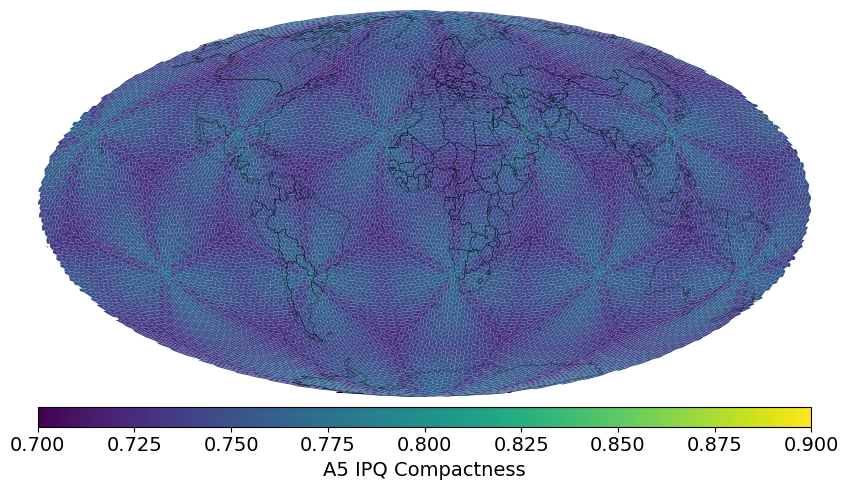

In [4]:
from vgrid.stats.a5stats import a5_compactness
a5_compactness(a5_inspect)

### A5 Statistics

In [1]:
from vgrid.stats.a5stats import a5stats
a5stats('km')

resolution      number_of_cells  avg_edge_len_km  avg_cell_area_km2
0            0                   12      4970.475286       4.250547e+07
1            1                   60      2222.864124       8.501094e+06
2            2                  240      1111.432062       2.125273e+06
3            3                  960       555.716031       5.313184e+05
4            4                 3840       277.858015       1.328296e+05
5            5                15360       138.929008       3.320740e+04
6            6                61440        69.464504       8.301849e+03
7            7               245760        34.732252       2.075462e+03
8            8               983040        17.366126       5.188656e+02
9            9              3932160         8.683063       1.297164e+02
10          10             15728640         4.341531       3.242910e+01
11          11             62914560         2.170766       8.107275e+00
12          12            251658240         1.085383       2.026819e+00
13          13           1006632960         0.542691       5.067047e-01
14          14           4026531840         0.271346       1.266762e-01
15          15          16106127360         0.135673       3.166904e-02
16          16          64424509440         0.067836       7.917261e-03
17          17         257698037760         0.033918       1.979315e-03
18          18        1030792151040         0.016959       4.948288e-04
19          19        4123168604160         0.008480       1.237072e-04
20          20       16492674416640         0.004240       3.092680e-05
21          21       65970697666560         0.002120       7.731700e-06
22          22      263882790666240         0.001060       1.932925e-06
23          23     1055531162664960         0.000530       4.832312e-07
24          24     4222124650659840         0.000265       1.208078e-07
25          25    16888498602639360         0.000132       3.020195e-08
26          26    67553994410557440         0.000066       7.550488e-09
27          27   270215977642229760         0.000033       1.887622e-09
28          28  1080863910568919040         0.000017       4.719055e-10
29          29  4323455642275676160         0.000008       1.179764e-10